# Task 10 : Benchmark Top ML Algorithms

This task tests your ability to use different ML algorithms when solving a specific problem.


### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

## Task Requirements
### You can have the following Classification models built using different ML algorithms
- Decision Tree
- KNN
- Logistic Regression
- SVM
- Random Forest
- Any other algorithm of your choice

### Use GridSearchCV for finding the best model with the best hyperparameters

- ### Build models
- ### Create Parameter Grid
- ### Run GridSearchCV
- ### Choose the best model with the best hyperparameter
- ### Give the best accuracy
- ### Also, benchmark the best accuracy that you could get for every classification algorithm asked above

#### Your final output will be something like this:
- Best algorithm accuracy
- Best hyperparameter accuracy for every algorithm

**Table 1 (Algorithm wise best model with best hyperparameter)**

Algorithm   |     Accuracy   |   Hyperparameters
- DT
- KNN
- LR
- SVM
- RF
- anyother

**Table 2 (Best overall)**

Algorithm    |   Accuracy    |   Hyperparameters



### Submission
- Submit Notebook containing all saved ran code with outputs
- Document with the above two tables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

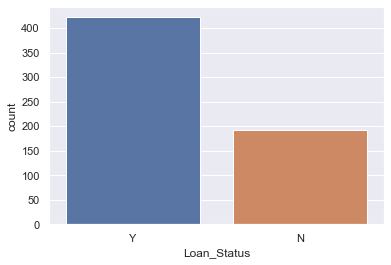

In [4]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Loan_Status", data=data)

Data is imbalanced

In [5]:
data=pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


checking missing values

In [6]:
data.isna().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data['Gender']= data['Gender'].fillna('U')
data['Married']= data['Married'].fillna('U')
data['Self_Employed']= data['Self_Employed'].fillna('U')

In [8]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:

from numpy import NaN
data[['LoanAmount','Loan_Amount_Term','Credit_History']] = data[['LoanAmount','Loan_Amount_Term','Credit_History']].replace(0, NaN)

In [10]:
data.fillna(data.mean(), inplace=True)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# Handling Categorical Variable

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
xm=data.apply(LabelEncoder().fit_transform)
xm

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,100,9,0,2,1
1,1,1,2,1,0,0,306,60,81,9,0,0,0
2,2,1,2,0,0,2,139,0,26,9,0,2,1
3,3,1,2,0,1,0,90,160,73,9,0,2,1
4,4,1,0,0,0,0,381,0,94,9,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,29,9,0,0,1
610,610,1,2,3,0,0,275,0,7,5,0,0,1
611,611,1,2,1,0,0,431,3,163,9,0,2,1
612,612,1,2,2,0,0,422,0,133,9,0,2,1


In [14]:
X=xm.drop(['Loan_Status'], axis=1)
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,376,0,100,9,0,2
1,1,1,2,1,0,0,306,60,81,9,0,0
2,2,1,2,0,0,2,139,0,26,9,0,2
3,3,1,2,0,1,0,90,160,73,9,0,2
4,4,1,0,0,0,0,381,0,94,9,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,29,9,0,0
610,610,1,2,3,0,0,275,0,7,5,0,0
611,611,1,2,1,0,0,431,3,163,9,0,2
612,612,1,2,2,0,0,422,0,133,9,0,2


In [15]:
y_new=xm.iloc[:,12]
y_new

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [16]:
test=pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv')

In [17]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [18]:
test['Gender']= test['Gender'].fillna('U')
test['Self_Employed']= test['Self_Employed'].fillna('U')

In [19]:
test.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [20]:
from numpy import NaN
test[['LoanAmount','Loan_Amount_Term','Credit_History']] = test[['LoanAmount','Loan_Amount_Term','Credit_History']].replace(0, NaN)

In [21]:
test.fillna(test.mean(), inplace=True)
test.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [22]:
test.Dependents.value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
xm_new=test.apply(LabelEncoder().fit_transform)
xm_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,251,0,52,11,0,2
1,1,1,1,1,0,0,102,43,67,11,0,2
2,2,1,1,2,0,0,230,67,120,11,0,2
3,3,1,1,2,0,0,43,110,42,11,0,2
4,4,1,0,0,1,0,120,0,25,11,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,2,177,65,54,11,0,2
363,363,1,1,0,0,0,186,12,56,11,0,2
364,364,1,0,0,0,0,117,75,67,11,0,1
365,365,1,1,0,0,0,230,101,95,11,0,0


In [24]:
X.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [25]:
X_train_new=X[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
X_train_new

y_train_new=xm.iloc[:,12]
y_train_new

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [26]:
X_train_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,376,0,100,9,0,2
1,1,1,2,1,0,0,306,60,81,9,0,0
2,2,1,2,0,0,2,139,0,26,9,0,2
3,3,1,2,0,1,0,90,160,73,9,0,2
4,4,1,0,0,0,0,381,0,94,9,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,125,0,29,9,0,0
610,610,1,2,3,0,0,275,0,7,5,0,0
611,611,1,2,1,0,0,431,3,163,9,0,2
612,612,1,2,2,0,0,422,0,133,9,0,2


In [27]:
y_train_new

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [28]:
X_test_new= xm_new
X_test_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,251,0,52,11,0,2
1,1,1,1,1,0,0,102,43,67,11,0,2
2,2,1,1,2,0,0,230,67,120,11,0,2
3,3,1,1,2,0,0,43,110,42,11,0,2
4,4,1,0,0,1,0,120,0,25,11,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,2,177,65,54,11,0,2
363,363,1,1,0,0,0,186,12,56,11,0,2
364,364,1,0,0,0,0,117,75,67,11,0,1
365,365,1,1,0,0,0,230,101,95,11,0,0


In [29]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size = 0.30, random_state=5)



In [30]:
n = 247
 
# Dropping last n rows using drop
y_new.drop(y_new.tail(n).index,
        inplace = True)
 
# Printing dataframe
print(y_new)

0      1
1      0
2      1
3      1
4      1
      ..
362    1
363    1
364    1
365    0
366    0
Name: Loan_Status, Length: 367, dtype: int32


In [31]:

print(X_train_new.shape)
print(X_test_new.shape)
print(y_train_new.shape)
print(y_new.shape)

(614, 12)
(367, 12)
(614,)
(367,)


In [32]:
y_test_new= y_new
y_test_new

0      1
1      0
2      1
3      1
4      1
      ..
362    1
363    1
364    1
365    0
366    0
Name: Loan_Status, Length: 367, dtype: int32

# Model Building

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()


In [34]:
knn_classifier.fit(X_train_new, y_train_new)


KNeighborsClassifier()

In [35]:
knn_predictions = knn_classifier.predict(X_test_new)


In [37]:
print(knn_classifier.score(X_test_new, y_test_new))
print(knn_classifier.score(X_train_new, y_train_new))

0.6294277929155313
0.750814332247557


# knn_classifier

In [38]:
from sklearn.model_selection import GridSearchCV


In [39]:
grid_params= {'n_neighbors':[3,5,11,19],'weights':['uniform','distance'],'metric':['euclidean','manhattan']
             }
            

In [40]:
gridsearch= GridSearchCV(knn_classifier,grid_params, verbose=1,cv=3,n_jobs=-1)

In [41]:
gs_results=gridsearch.fit(X_train_new, y_train_new)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [42]:
gs_results.best_score_

0.6872947553004941

In [43]:
gs_results.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [44]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}

# Random Forest With GridsearchCv

In [45]:
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [46]:
rf_results=grid_search.fit(X_train_new, y_train_new)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [58]:
rf_results.best_score_


0.6645145863223337

In [47]:
rf_results.best_params_


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

# Decision Tree with GridSearchCv

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt=grid_search_cv.fit(X_train_new, y_train_new)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


In [49]:
grid_search_cv.best_params_

{'max_leaf_nodes': 2, 'min_samples_split': 2}

In [50]:
grid_search_cv.best_score_

0.5604654870078113

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
import numpy as np


model=LogisticRegression()

In [52]:
from sklearn.model_selection import RepeatedStratifiedKFold
# Create grid search object
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
lg = grid_search.fit(X_train_new, y_train_new)

In [54]:
lg.best_score_

0.686770668076855

In [53]:
lg.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

# svm

In [ ]:
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(),param_grid)


In [ ]:
grid.fit(X_train_new,y_train_new)

In [59]:
grid.best_score_

AttributeError: 'dict' object has no attribute 'best_score_'

# Naivebayes

In [55]:
import numpy as np
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train_new, y_train_new)
print(nbModel_grid.best_estimator_)
...
#Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(priors=None, var_smoothing=1.0)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1.0)


GaussianNB(var_smoothing=1.0)

In [57]:
print(nbModel_grid.best_score_)
print(nbModel_grid.best_params_)

0.6873083024854575
{'var_smoothing': 1.0}


# AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train_new, y_train_new)
print("score on test: " + str(adb.score(X_test_new, y_test_new)))
print("score on train: "+ str(adb.score(X_train_new, y_train_new)))

# BaggingClassifier

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train_new, y_train_new)
print("score on test: " + str(bg.score(X_test_new, y_test_new)))
print("score on train: "+ str(bg.score(X_train_new, y_train_new)))

score on test: 0.3896457765667575
score on train: 0.9071661237785016


# Voting Classifier

In [62]:
from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('gs_results',gs_results),('lg',lg),('rf_results',rf_results),('dt',dt),('bg',bg),('adb',adb)],voting='hard')
evc.fit(X_train_new, y_train_new)
print("score on test: " + str(evc.score(X_test_new, y_test_new)))
print("score on train: "+ str(evc.score(X_train_new, y_train_new)))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits
Fitting 3 folds for each of 294 candidates, totalling 882 fits
score on test: 0.6866485013623979
score on train: 0.739413680781759
